<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Data_Preproessing/Segmentation_Geolife_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_dir = 'drive/MyDrive/University/PiLab/Experiment/Data/Test/Geolife/'

In [ ]:
os.chdir( data_dir )

In [ ]:
trainFiles = glob.glob( '*plt' )
n = len( trainFiles )

trajectory_data = [ ]
trajectory_distance = [ ]
trajectory_mean = [ ]
for i, file in enumerate(trainFiles):
    csv_file = pd.read_csv( file, names = [ 'lat', 'long', 'zero', 'alti', 'date_number', 'date_string', 'time'  ] )[6:]
    csv_file.index = range( 0, len( csv_file ) )
    print(csv_file.head())

    curr_data = [ [ float( csv_file['lat'][0] ), float( csv_file['long'][0] ) ] ]
    curr_distance = [ ]
    for lat, long in zip( csv_file['lat'][1:], csv_file['long'][1:] ):
        curr_data.append( [ float(lat), float(long) ] )
        curr_distance.append( np.linalg.norm( [ curr_data[-1][0] - curr_data[-2][0], curr_data[-1][1] - curr_data[-2][1] ] ) )

    trajectory_data.append( np.array(curr_data) )
    trajectory_distance.append( np.array( curr_distance ) )
    trajectory_mean.append( np.mean( np.array( curr_distance ) ) )

trajectory_mean = np.array( trajectory_mean, dtype = np.float32 )

print( trajectory_mean )

         lat        long  zero alti   date_number date_string      time
0   40.01229  116.297072   0.0  492  39749.026690  2008-10-28  00:38:26
1  40.012594  116.297269   0.0  490  39749.026748  2008-10-28  00:38:31
2  40.012581  116.297263   0.0  490  39749.026806  2008-10-28  00:38:36
3  40.012453  116.297177   0.0  490  39749.026863  2008-10-28  00:38:41
4  40.012398  116.297133   0.0  490  39749.026921  2008-10-28  00:38:46
         lat        long  zero alti   date_number date_string      time
0  39.984702  116.318417   0.0  492  39744.120185  2008-10-23  02:53:04
1  39.984683  116.318450   0.0  492  39744.120255  2008-10-23  02:53:10
2  39.984686  116.318417   0.0  492  39744.120313  2008-10-23  02:53:15
3  39.984688  116.318385   0.0  492  39744.120370  2008-10-23  02:53:20
4  39.984655  116.318263   0.0  492  39744.120428  2008-10-23  02:53:25
         lat        long  zero alti   date_number date_string      time
0  40.008304  116.319876   0.0  492  39745.090266  2008-10-24  0

In [ ]:
print( len( trajectory_data ), len( trajectory_data[0] ), len( trajectory_data[0][0] ) )
print( len( trajectory_data ), len( trajectory_data[1] ), len( trajectory_data[0][0] ) )

5 1477 2
5 908 2


In [ ]:
labels = [ ]
label_num = [ ]
for distances, mean in zip( trajectory_distance, trajectory_mean ):
    max_label, curr_label = 0, [ 0 ]
    for curr_distance in distances:
        if ( mean < curr_distance ):
            max_label += 1
        curr_label.append( max_label )
    labels.append( np.array( curr_label ) )
    label_num.append( max_label )

In [ ]:
print( label_num )

[464, 228, 71, 102, 4]


# Visualization

In [ ]:
colors = [ 'red', 'orange', 'yellow', 'green' ]

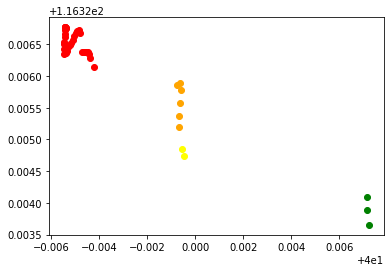

In [ ]:
result = trajectory_data[4]
for j in range( 4 ):
    plt.scatter( result[labels[4] == j, 0], result[labels[4] == j, 1], c = colors[j] )

plt.savefig( 'Kmeans_Result.png', dpi = 100 )
plt.show()